In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Set the default font size for plots
matplotlib.rcParams['font.size'] = 20

data = pd.read_csv("results.csv")

# Initialize counter for plot names
count = 1

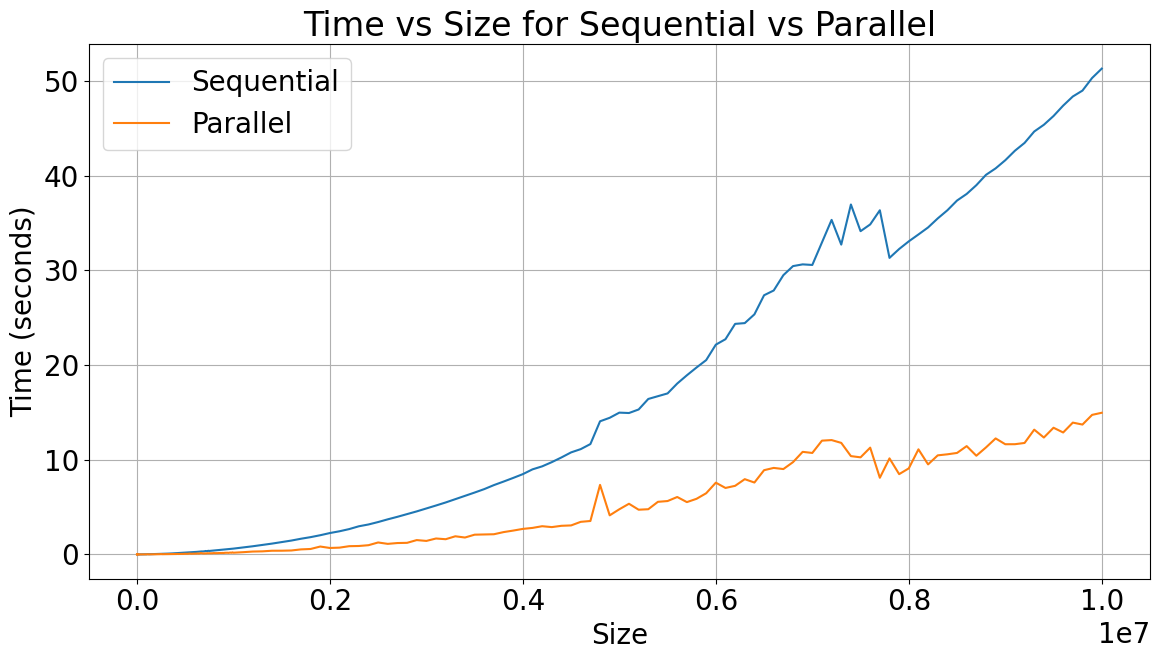

In [3]:
# Filter the DataFrame by 'type'
df_sequential = data[data['type'] == 'sequential']
df_parallel = data[data['type'] == 'parallel']

# Average the 'duration' by 'size' for both Sequential and Parallel types
average_durations_sequential = df_sequential.groupby('size')['duration'].mean().reset_index()
average_durations_parallel = df_parallel.groupby('size')['duration'].mean().reset_index()

# Plot the averaged durations against size
plt.figure(figsize=(12,7))

sns.lineplot(x='size', y='duration', data=average_durations_sequential, label='Sequential')
sns.lineplot(x='size', y='duration', data=average_durations_parallel, label='Parallel')

plt.xlabel('Size')
plt.ylabel('Time (seconds)')
plt.title('Time vs Size for Sequential vs Parallel')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.savefig('line_plot')
plt.show()

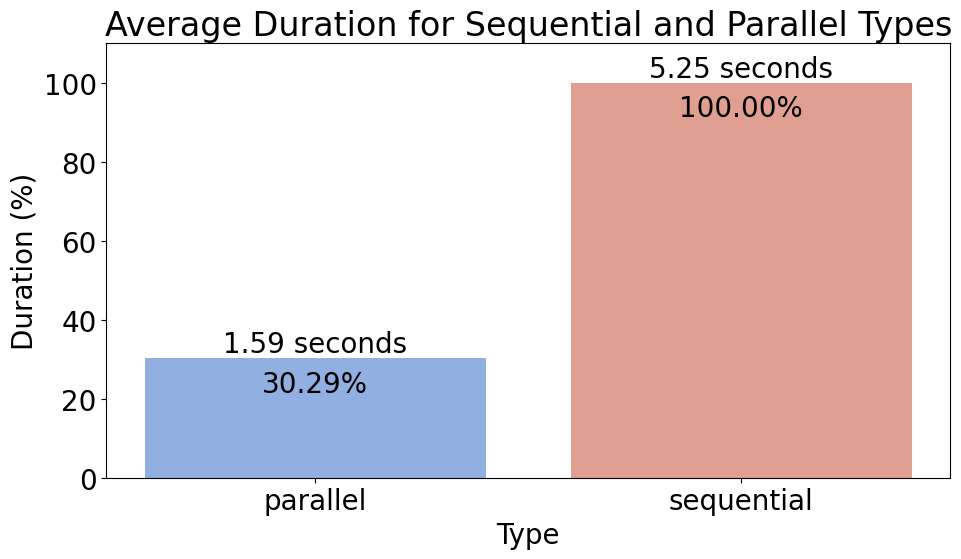

In [16]:
# Filter the data by type and calculate the average duration
average_durations = data.groupby('type')['duration'].mean().reset_index()

# Save the original durations for annotation
original_durations = average_durations.copy()


# Convert the 'parallel' type duration to a percentage of the 'sequential' type duration
sequential_duration = average_durations.loc[average_durations['type'] == 'sequential', 'duration'].values[0]
average_durations.loc[average_durations['type'] == 'parallel', 'duration'] = (average_durations.loc[average_durations['type'] == 'parallel', 'duration'] / sequential_duration) * 100
average_durations.loc[average_durations['type'] == 'sequential', 'duration'] = 100  # as it's considered as 100%
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(average_durations['type'], average_durations['duration'], color=['#91AFE1', '#E19F91'])
plt.xlabel('Type')
plt.ylabel('Duration (%)')
plt.title('Average Duration for Sequential and Parallel Types')
plt.ylim(0, 110)  # to ensure the sequential bar doesn’t go off the chart

# Annotating the bars with the original average duration values
for bar, original_duration in zip(bars, original_durations['duration']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{original_duration:.2f} seconds', va='bottom', ha='center')  # adjust the position as per your requirement
for bar, average_duration in zip(bars, average_durations['duration']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval - 10, f'{average_duration:.2f}%', va='bottom', ha='center')  # adjust the position as per your requirement
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

ModuleNotFoundError: No module named 'plotly'

In [6]:
# # Replace 0's with 1's in 'duration' column where 'type' is 'sequential'
# data.loc[(data['duration'] == 0) & (data['type'] == 'sequential'), 'duration'] = 1

# # Calculate average durations
# avg_durations = data.groupby(['size', 'type'])['duration'].mean().reset_index()

# # Initialize a new column for normalized duration
# avg_durations['normalized_duration'] = avg_durations['duration']

# # Calculate normalized durations
# for size in data['size'].unique():
#     speedup = data[(data['size'] == size) & (data['type'] == 'sequential')]
#     print(subset)
#     print(f"Size: {size}")
#     #avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'parallel'), 'normalized_duration'] = (100 * avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'parallel'), 'duration'].values[0]) / seq_duration

# # Create line plot
# plt.figure(figsize=(12,6))
# sns.lineplot(x='size', y='normalized_duration', hue='type', data=avg_durations)
# plt.title('Normalized Average Duration of Parallel vs Sequential by Size')
# plt.ylabel('Normalized Duration (%)')
# plt.xlabel('Size')
# plt.show()

In [5]:
# Step 1: Calculate Average Duration
filtered_df = data1[data1['size'] != 10]
avg_durations = filtered_df.groupby(['size', 'type'])['duration'].mean().reset_index()

# Step 2: Normalize Durations
# Initializing a new column for normalized duration
avg_durations['normalized_duration'] = 0

for size in avg_durations['size'].unique():
    # Find the sequential duration for this size
    seq_duration = avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'duration'].values[0]
    
    # Set the sequential duration as 100%
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'normalized_duration'] = 100
    
    # Set the parallel duration as the percentage relative to the sequential duration
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'normalized_duration'] = (100 * avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'duration'].values[0]) / seq_duration

# Step 3: Plot
plt.figure(figsize=(12,6))
sns.barplot(x='size', y='normalized_duration', hue='type', data=avg_durations)
plt.title('Normalized Average Duration of Parallel vs Sequential by Size')
plt.ylabel('Normalized Duration (%)')
plt.show()

NameError: name 'data1' is not defined

In [7]:
# Step 1: Calculate Average Duration
filtered_df = data1[data1['size'] != 10]
filtered_df = filtered_df[filtered_df['size'] != 100]
avg_durations = filtered_df.groupby(['size', 'type'])['duration'].mean().reset_index()

# Step 2: Normalize Durations
# Initializing a new column for normalized duration
avg_durations['normalized_duration'] = 0

for size in avg_durations['size'].unique():
    # Find the sequential duration for this size
    seq_duration = avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'duration'].values[0]
    
    # Set the sequential duration as 100%
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'normalized_duration'] = 100
    
    # Set the parallel duration as the percentage relative to the sequential duration
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'normalized_duration'] = (100 * avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'duration'].values[0]) / seq_duration

# Step 3: Plot
plt.figure(figsize=(12,6))
sns.barplot(x='size', y='normalized_duration', hue='type', data=avg_durations)
plt.title('Normalized Average Duration of Parallel vs Sequential by Size')
plt.ylabel('Normalized Duration (%)')
plt.show()

NameError: name 'data1' is not defined

In [8]:
avg_durations = data.groupby(['size', 'type'])['duration'].mean().reset_index()

# Step 2: Normalize Durations
# Initializing a new column for normalized duration
avg_durations['normalized_duration'] = 0

for size in avg_durations['size'].unique():
    # Find the sequential duration for this size
    seq_duration = avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'duration'].values[0]
    
    # Set the sequential duration as 100%
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'normalized_duration'] = 100
    
    # Set the parallel duration as the percentage relative to the sequential duration
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'normalized_duration'] = (100 * avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'duration'].values[0]) / seq_duration

# Step 3: Plot
plt.figure(figsize=(12,6))
sns.barplot(x='size', y='normalized_duration', hue='type', data=avg_durations)
plt.title('Normalized Average Duration of Parallel vs Sequential by Size')
plt.ylabel('Normalized Duration (%)')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [9]:
# Step 1: Calculate Average Duration
filtered_df = data[data['size'] != 10]
avg_durations = filtered_df.groupby(['size', 'type'])['duration'].mean().reset_index()

# Step 2: Normalize Durations
# Initializing a new column for normalized duration
avg_durations['normalized_duration'] = 0

for size in avg_durations['size'].unique():
    # Find the sequential duration for this size
    seq_duration = avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'duration'].values[0]
    
    # Set the sequential duration as 100%
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'normalized_duration'] = 100
    
    # Set the parallel duration as the percentage relative to the sequential duration
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'normalized_duration'] = (100 * avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'duration'].values[0]) / seq_duration

# Step 3: Plot
plt.figure(figsize=(12,6))
sns.barplot(x='size', y='normalized_duration', hue='type', data=avg_durations)
plt.title('Normalized Average Duration of Parallel vs Sequential by Size')
plt.ylabel('Normalized Duration (%)')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [10]:
# Step 1: Calculate Average Duration
filtered_df = data[data['size'] != 10]
filtered_df = filtered_df[filtered_df['size'] != 100]
avg_durations = filtered_df.groupby(['size', 'type'])['duration'].mean().reset_index()

# Step 2: Normalize Durations
# Initializing a new column for normalized duration
avg_durations['normalized_duration'] = 0

for size in avg_durations['size'].unique():
    # Find the sequential duration for this size
    seq_duration = avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'duration'].values[0]
    
    # Set the sequential duration as 100%
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'normalized_duration'] = 100
    
    # Set the parallel duration as the percentage relative to the sequential duration
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'normalized_duration'] = (100 * avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'duration'].values[0]) / seq_duration

# Step 3: Plot
plt.figure(figsize=(12,6))
sns.barplot(x='size', y='normalized_duration', hue='type', data=avg_durations)
plt.title('Normalized Average Duration of Parallel vs Sequential by Size')
plt.ylabel('Normalized Duration (%)')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [11]:
avg_durations = data.groupby(['size', 'type'])['duration'].mean().reset_index()
# Initialize a new column for relative percentage
avg_durations['relative_percentage'] = 0

for size in avg_durations['size'].unique():
    # Find the average 'Sequential' duration for this size
    sequential_duration = avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'duration'].values[0]
    
    # Find the average 'Parallel' duration for this size
    parallel_duration = avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'duration'].values[0]
    
    # Calculate the 'Parallel' duration as a percentage of the 'Sequential' duration
    relative_percentage = (sequential_duration / parallel_duration) * 100
    
    # Update the 'relative_percentage' column
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'relative_percentage'] = relative_percentage
    
# Filtering the DataFrame to include only 'Parallel' rows
parallel_avg_durations = avg_durations[avg_durations['type'] == 'Parallel']

plt.figure(figsize=(12,6))
sns.barplot(x='size', y='relative_percentage', data=parallel_avg_durations)
plt.title('Average Parallel Duration as Percentage of Sequential')
plt.ylabel('Relative Duration (%)')
plt.xlabel('Size')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [12]:
avg_durations = data1.groupby(['size', 'type'])['duration'].mean().reset_index()
# Initialize a new column for relative percentage
avg_durations['relative_percentage'] = 0

for size in avg_durations['size'].unique():
    # Find the average 'Sequential' duration for this size
    sequential_duration = avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Sequential'), 'duration'].values[0]
    
    # Find the average 'Parallel' duration for this size
    parallel_duration = avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'duration'].values[0]
    
    # Calculate the 'Parallel' duration as a percentage of the 'Sequential' duration
    relative_percentage = (sequential_duration / parallel_duration) * 100
    
    # Update the 'relative_percentage' column
    avg_durations.loc[(avg_durations['size'] == size) & (avg_durations['type'] == 'Parallel'), 'relative_percentage'] = relative_percentage
    
# Filtering the DataFrame to include only 'Parallel' rows
parallel_avg_durations = avg_durations[avg_durations['type'] == 'Parallel']

plt.figure(figsize=(12,6))
sns.barplot(x='size', y='relative_percentage', data=parallel_avg_durations)
plt.title('Average Parallel Duration as Percentage of Sequential')
plt.ylabel('Relative Duration (%)')
plt.xlabel('Size')
plt.show()

NameError: name 'data1' is not defined